In [1]:
import cv2 #import
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#A function to display the image
def display_img(img):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

### GRADIENTS
An Image gradient is a directional change in the intensity or color in an image.

Sobel operators are used to perform basic gradient operations.

The operator uses two 3x3 kernels which are convolved with the original image to calculate approximations of derivatives- one for horizontal changes and one for vertical.

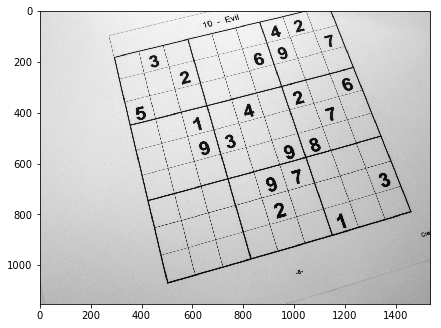

In [2]:
img = cv2.imread('Images/sudoku.jpg', 0)
display_img(img)

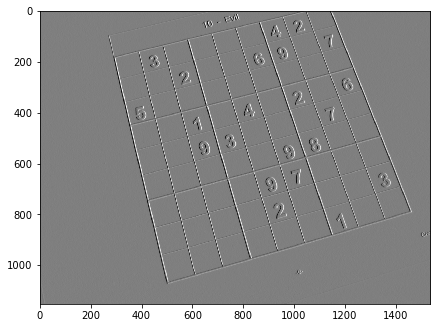

In [3]:
sobelx = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
display_img(sobelx)

# The third and fourth parameters are the derivative constants of X and Y respectively.
# parameter 3 is 1, as we are calculating the X gradient.

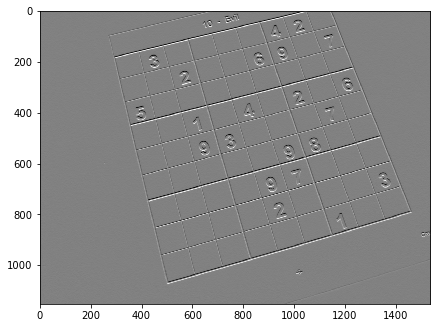

In [4]:
sobelx = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)
display_img(sobelx)

# 4th parameter is 1, as we are calculating the Y gradient

### Laplacian operator
##### This method basically calculates the laplacian of the image given by the relationship of general laplace operator.

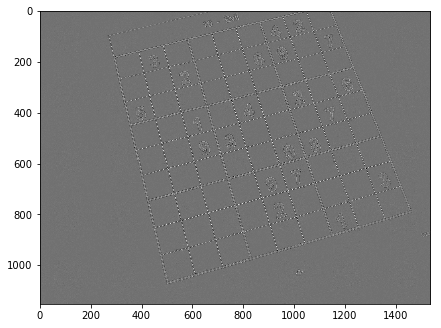

In [5]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
display_img(laplacian)

### HISTOGRAMS
General Histograms are a graphical representation of the distribution of a continuous feature.
##### For Images:
For images, we can display the frequency of values of colors.

Each of the three RGB channels has values between 0-255. We can plot these 3 histograms on top of each other to see how much of each channel there is.

In [6]:
dark_horse = cv2.imread('Images/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('Images/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('Images/rainbow.jpeg')
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [7]:
#OPENCV BGR Channels, so index [0] is Blue

histValues = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
histValues.shape

(256, 1)

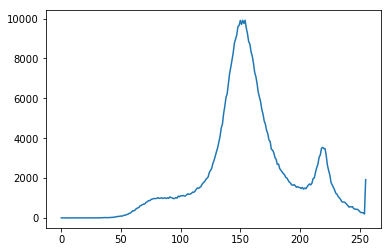

In [8]:
plt.plot(histValues)

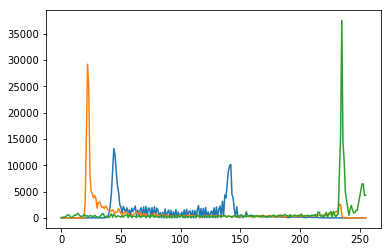

In [9]:
img = rainbow
color = ('b','g','r')
for i,color in enumerate(color):
    histValues = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histValues)
    


#### HISTOGRAM EQUALIZATION AND , ON MASKED PORTIONS

Histogram equalization is a method of contrast adjustment based on the image's histogram.

Applying Histogram equalization reduces the color depth(shades of grey).

### MASKED PORTIONS


In [10]:
img = rainbow

In [11]:
img.shape

(474, 474, 3)

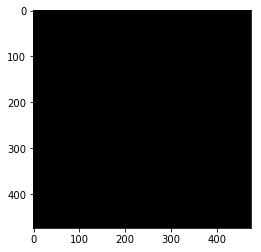

In [12]:
mask = np.zeros(img.shape[:2], np.uint8)
plt.imshow(mask,cmap='gray')

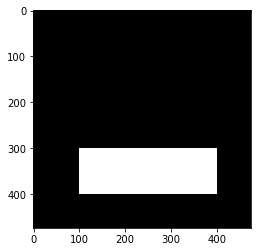

In [13]:
#creating a mask on the blank image
mask[300:400,100:400] = 100
plt.imshow(mask, cmap='gray')

In [14]:
maskedRainbow = cv2.bitwise_and(img,img,mask = mask)
#this one is for the actual histogram calc

show_maskedRainbow = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)
#show_maskedRainbow is purely for visualization purposes

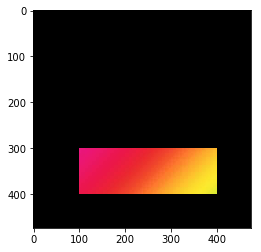

In [15]:
plt.imshow(show_maskedRainbow)

In [16]:
hist_mask_values_red = cv2.calcHist([show_maskedRainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [17]:
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'MASKED')

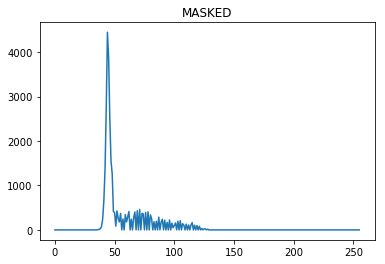

In [18]:
plt.plot(hist_mask_values_red)
plt.title("MASKED")

Text(0.5,1,'MASKED')

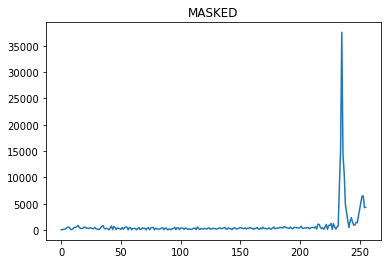

In [19]:
plt.plot(hist_values_red)
plt.title("MASKED")

### HISTOGRAM EQUALIZATION

In [20]:
hills = cv2.imread('Images/hills.jpeg',0)

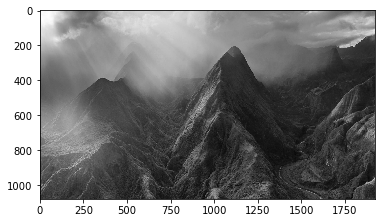

In [21]:
plt.imshow(hills,cmap='gray')

In [22]:
histHills = cv2.calcHist([hills],channels=[0], mask = None, histSize=[256], ranges=[0,256])

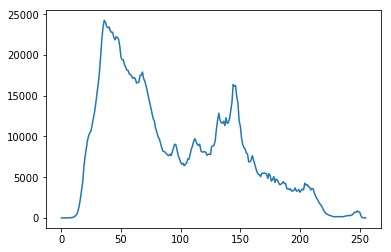

In [23]:
plt.plot(histHills)

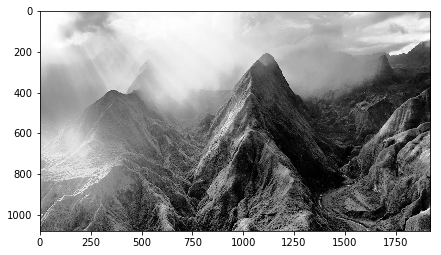

In [24]:
equalizedHills = cv2.equalizeHist(hills)
display_img(equalizedHills)

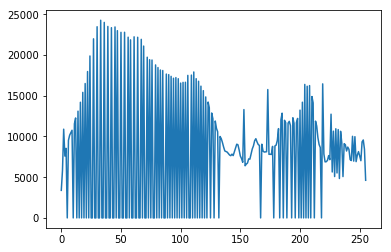

In [25]:
histHills = cv2.calcHist([equalizedHills],channels=[0], mask = None, histSize=[256], ranges=[0,256])
plt.plot(histHills)